In [210]:
import pandas as pd, numpy as np

In [224]:
c='bp'
df=pd.read_csv('data/'+c+'.csv')
df['time']=pd.to_datetime(df['time'])
df=df.set_index('time')
df=df.sort_index()

In [225]:
nepi=pd.read_excel('idojaras2.xlsx')

Setup plot params

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
path = 'KulimPark-Regular.ttf'
path2 = 'Symbola.ttf'
prop = font_manager.FontProperties(fname=path)
prop2 = font_manager.FontProperties(fname=path2)

In [228]:
color_none='#E7CFBC'
color_none2='#F2B880'
color_ax=color_none
color_plus='#C98686'
color_minus='#966B9D'
color_good='#4d9221'
color_bad='#c51b7d'
color_bg='#FFF4EC'
font_size=12
s=40
m1={'Temp':'☼','Wind':'►','Hail':'▲','Snow':'▲','Snow Depth':'▲','Rain':'☔️'}
m2={'Temp':'❄️','Wind':'◄','Hail':'▼','Snow':'▼','Snow Depth':'▼','Rain':'☂️'}
m3={'Temp':'♨️','Rain':'☂️','Hail':'❄️','Snow':'⛷️','Snow Depth':'⛄️','Wind':'☘','Cloud':'☁️','NoCloud':'☀️'}

In [235]:
def spine_plot(datum,title,mondas,jelentes,kondicio,mennyiseg,prediction_ts,observation_ratio_good,observation_ratio_bad,ertek_is_plus,good_is_plus,axv1=0,axv2=0,tp=False):
    y=prediction_ts.values
    x=prediction_ts.index
    fig,axes=plt.subplots(1,3,figsize=(8,5),gridspec_kw={'width_ratios': [1, 3, 1]})
    ax=axes[1]
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=color_none)
    ax.scatter(y,x,s,color=color_none,zorder=10)
    ex=max(y)-min(y)
    text_off=abs(ex*0.04)
    text_align='left'
    if y[0]<0:
        text_off=-text_off
        text_align='right'
    ax.text(y[0]+text_off, x[0], str(x[0]), fontsize=font_size*0.9, 
            horizontalalignment=text_align, verticalalignment='center', 
            color=color_none, fontproperties=prop)
    text_off=abs(text_off)
    text_align='left'
    if y[-1]<0:
        text_off=-text_off
        text_align='right'
    ax.text(y[-1]+text_off, x[-1], str(x[-1]), fontsize=font_size*0.9, 
            horizontalalignment=text_align, verticalalignment='center', 
            color=color_none, fontproperties=prop)
    
    y=prediction_ts.loc[observation_ratio_bad.index].values
    x=prediction_ts.loc[observation_ratio_bad.index].index
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=color_none)
    ax.scatter(y,x,s,color=color_none,zorder=10)
    

    z=prediction_ts.loc[observation_ratio_good.index]
    if axv2!=99:
        z1=z[z>=axv2].dropna()
        z2=z[z<axv2].dropna()
        y=z1.values
        x=z1.index
        for i,e in enumerate(y):
            ax.plot([0,e],[x[i],x[i]],color=color_plus)
        ax.scatter(y,x,s,color=color_plus,zorder=12)
        y=z2.values
        x=z2.index
        for i,e in enumerate(y):
            ax.plot([0,e],[x[i],x[i]],color=color_minus)
        ax.scatter(y,x,s,color=color_minus,zorder=11)
        ax.plot([axv2,axv2],[1971,2020],color=color_ax,ls='--')
    else:
        axv2=1
        z1=z[((z<=axv2)&(z[z>=-axv2]))].dropna()
        z2=pd.concat([z[z>axv2],z[z<-axv2]]).dropna()
        y=z1.values
        x=z1.index
        for i,e in enumerate(y):
            ax.plot([0,e],[x[i],x[i]],color=color_plus,zorder=5)
        ax.scatter(y,x,s,color=color_plus,zorder=12)
        y=z2.values
        x=z2.index
        for i,e in enumerate(y):
            ax.plot([0,e],[x[i],x[i]],color=color_minus)
        ax.scatter(y,x,s,color=color_minus,zorder=11)
        ax.plot([-axv2,-axv2],[1971,2020],color=color_ax,ls='--',zorder=1)
        ax.plot([axv2,axv2],[1971,2020],color=color_ax,ls='--',zorder=1)

    if good_is_plus:
        plus=color_good
        minus=color_bad
        plus_glyph='✔️'
        minus_glyph='✖️'
    else:
        plus=color_bad
        minus=color_good
        plus_glyph='✖️'
        minus_glyph='✔️'
    
    ax.set_ylim(1965,2020)
    ax.axvline(0,color=color_ax)
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.axis('off')
    ax.text(ex*0.1, 1966, str(len(z1)), fontsize=font_size, 
            horizontalalignment='left', color=plus, fontproperties=prop)
    ax.text(ex*0.02, 1966, plus_glyph, fontsize=font_size, 
            horizontalalignment='left', color=plus, fontproperties=prop2)
    ax.text(-ex*0.1, 1966, str(len(z2)), fontsize=font_size, 
            horizontalalignment='right', color=minus, fontproperties=prop)
    ax.text(-ex*0.02, 1966, minus_glyph, fontsize=font_size, 
            horizontalalignment='right', color=minus, fontproperties=prop2)
    ax.text(ex*0.02, 2021.5, m1[mennyiseg], 
            horizontalalignment='left', color=color_plus, fontproperties=prop2, fontsize=font_size*1.5)
    ax.text(-ex*0.02, 2021.5, m2[mennyiseg],
            horizontalalignment='right', color=color_minus, fontproperties=prop2, fontsize=font_size*1.5)
    
    
    if len(z1)>len(z2):
        color_title=plus
    else:
        color_title=minus
    
    
    if ertek_is_plus:
        plus=color_none2
        minus=color_none
        plus_glyph='✔️'
        minus_glyph='✖️'
    else:
        plus=color_none
        minus=color_none2
        plus_glyph='✖️'
        minus_glyph='✔️'
        
    ax=axes[0]
    z=pd.concat([observation_ratio_good,observation_ratio_bad])
    ex=max(z.values)-min(z.values)
    z1=z[z>=axv1].dropna()
    z2=z[z<axv1].dropna()
    y=z1.values
    x=z1.index
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=plus)
    ax.scatter(y,x,s*0.4,color=plus,zorder=12)
    ax.text(ex*0.25, 1966, str(len(z1)), fontsize=font_size, 
            horizontalalignment='left', color=plus, fontproperties=prop)
    ax.text(ex*0.04, 1966, plus_glyph, fontsize=font_size, 
            horizontalalignment='left', color=plus, fontproperties=prop2)
    y=z2.values
    x=z2.index
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=minus)
    ax.scatter(y,x,s*0.4,color=minus,zorder=11)
    ax.text(-ex*0.25, 1966, str(len(z2)), fontsize=font_size, 
            horizontalalignment='right', color=minus, fontproperties=prop)
    ax.text(-ex*0.04, 1966, minus_glyph, fontsize=font_size, 
            horizontalalignment='right', color=minus, fontproperties=prop2)
    ax.text(axv1, 2022, m3[kondicio], 
            horizontalalignment='center', color=color_none2, fontproperties=prop2, fontsize=font_size*1.5)
    
    
    ax.set_ylim(1965,2020)
    ax.axvline(0,color=color_ax)
    ax.plot([axv1,axv1],[1971,2020],color=color_none2,ls='--')
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.axis('off')
    
    ax= axes[2].inset_axes([0, 0.25, 1, 0.5])
    x=observation_ratio_good.values
    y=prediction_ts.loc[observation_ratio_good.index].values
    if good_is_plus:
        plus=color_good
        minus=color_bad
    else:
        plus=color_bad
        minus=color_good
    colors=[plus if i>0 else minus for i in y]
    if not ertek_is_plus: x=-x
    if not good_is_plus: y=-y
    if len(x)>1:
        x-=min(x)
        x/=max(x)
    else:
        x=[0.5]
    if len(y)>1:
        y-=min(y)
        y/=max(y)
    else:
        y=[0.5]
    ax.plot([-0.1,-0.1],[-0.1,1.1],color=color_none)
    ax.plot([-0.1,1.1],[-0.1,-0.1],color=color_none2)
    ax.plot([-0.1,1.1],[-0.1,1.1],color=color_none,ls='--')
    ax.text(1.15, -0.1, m3[kondicio], verticalalignment='center',
            horizontalalignment='left', color=color_none2, fontproperties=prop2, fontsize=font_size*1.3)
    ax.text(-0.1, 1.15, m3[mennyiseg], verticalalignment='bottom',
            horizontalalignment='center', color=color_none, fontproperties=prop2, fontsize=font_size*1.3)
    
    ax.scatter(x,y,s*0.4,color=colors,zorder=10)
    ax.axis('off')
    
    ax=axes[2]
    ax.axis('off')
    
    fig.text(0.5,0.04,datum[:-1].capitalize()+' - '+jelentes,color=color_ax,fontproperties=prop,fontsize=font_size*0.7,horizontalalignment='center')
    plt.suptitle(title,y=0.1,color=color_title,fontproperties=prop)
    # ax.text(0, 1960, title, fontsize=font_size, horizontalalignment='center', color=color_ax)
    
#     plt.savefig(str(mondas)+'.png',dpi=300, transparent=tp)
    plt.savefig(c+'/'+str(mondas)+'.png',dpi=300, facecolor=color_bg)
    plt.show()

In [236]:
mondasok=[]
mondasok+=[0,1]
mondasok+=[5]
mondasok+=[6,8,9,10,11]
mondasok+=[12,50,52]
mondasok+=[4,7,30,29]
mondasok+=[14,17,18,22,31,32,33,34,35,36,37,39,40,41,42,43,44,48,49,53,54,55,57]
mondasok+=[56,60]
mondasok+=[15,47]
mondasok+=[23,26]
mondasok+=[16,24,25]
mondasok+=[38,45,51]

In [237]:
len(mondasok),len(set(mondasok))

(50, 50)

In [238]:
mondasok=[22,23]

In [239]:
dz=df.fillna(0)

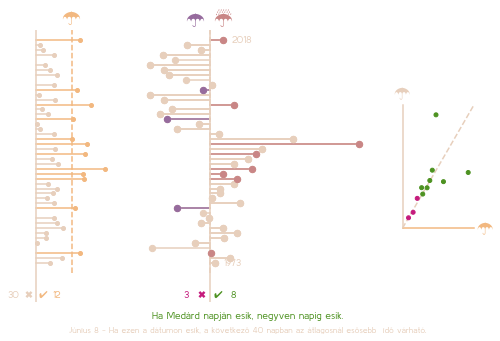

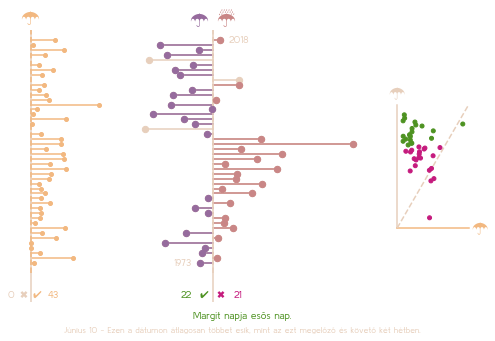

In [240]:
for mondas in mondasok:
    nep=nepi.loc[mondas]
    observation_range=[nep['Dátum:mettől']+pd.to_timedelta('-1D'),nep['Dátum:meddig']+pd.to_timedelta('+2D')]
    prediction_range=[nep['Periódus:mettől'],nep['Periódus:meddig']+pd.to_timedelta('+1D')]
    
    dgs=[]
    dhs=[]
    axv1=0
    axv2=0
    fagy_cutoff=0
    for year in range(1973,2019):
        k=0
        from_date=pd.to_datetime(str(year)+'-'+str(observation_range[k].month)+'-'+str(observation_range[k].day))
        from_pred=pd.to_datetime(str(year)+'-'+str(prediction_range[k].month)+'-'+str(prediction_range[k].day))
        k=1
        to_date=pd.to_datetime(str(year)+'-'+str(observation_range[k].month)+'-'+str(observation_range[k].day))
        to_pred=pd.to_datetime(str(year)+'-'+str(prediction_range[k].month)+'-'+str(prediction_range[k].day))
        if to_pred<to_date:
            to_pred+=pd.to_timedelta('1Y')
        dg=dz.loc[from_date:]
        dg=dg[:to_date]
        dgs.append(dg)
        dh=dz.loc[from_pred:]
        dh=dh[:to_pred]
        dhs.append(dh)
    observation_data=pd.concat(dgs)
    prediction_data=pd.concat(dhs)
    
    
    ertek_is_comp=False
    ertek_is_same=False
    if nep['Érték'] in ['+','>0']:
        ertek_is_plus=True
    elif nep['Érték'] in ['A','B']:
        ertek_is_comp=True
        if nep['Érték']=='A':
            ertek_is_plus=True
            if nep['Irány']=='A':
                ertek_is_same=True
        else:
            ertek_is_plus=False
    else:
        ertek_is_plus=False
        
    if nep['Irány'] in ['+','>0']:
        good_is_plus=True
    elif nep['Irány'] in ['A','B']:
        if nep['Irány']=='B':
            good_is_plus=True
        else:
            good_is_plus=False
    else:
        good_is_plus=False
    
    if nep['Érték'] in ['<0', '0']:
        ertek_is_negative=True
    else:
        ertek_is_negative=False
        
    if nep['Irány'] in ['<0', '0']:
        good_is_negative=True
    else:
        good_is_negative=False
    
    
    if nep['Kondíció'] in ['Rain','Snow','Cloud','NoCloud']:
        if nep['Kondíció']=='Rain':
            obs_key=6
            rainy_cutoff=6/24
        if nep['Kondíció']=='Snow':
            obs_key=7
            rainy_cutoff=3/24
        if nep['Kondíció']=='NoCloud':
            obs_key=10
            rainy_cutoff=6/24
        if nep['Kondíció']=='Cloud':
            obs_key=1
            rainy_cutoff=6/24
        if nep['Kondíció']=='Hail':
            obs_key=11
            rainy_cutoff=1/24
        if ertek_is_comp:
            rainy_cutoff=0
            ertek_is_plus=True
        axv1=rainy_cutoff
        observation_total=observation_data.groupby(['year']).count()[['hour']]
        observation_total.columns=['total']
        observation_ratio=observation_data.groupby(['year','W']).count()[['hour']].join(observation_total)
        observation_ratio['ratio']=observation_ratio['hour']/observation_ratio['total']
        observation_ratio=observation_ratio.reset_index().set_index(['W','year']).loc[obs_key][['ratio']]
        observation_ratio_good=observation_ratio[observation_ratio['ratio']>rainy_cutoff].dropna()
        observation_ratio_bad=observation_ratio[observation_ratio['ratio']<=rainy_cutoff].dropna()

        if nep['Mennyiség']=='Temp':
            pred_key='TEMP'
            fagy_cutoff=0 #napi atlaghomerseklet, hogy azt mondjuk "fagy"
        elif nep['Mennyiség']=='Snow Depth':
            pred_key='SD'
            fagy_cutoff=1
            good_is_negative=True
        elif nep['Mennyiség']=='Wind':
            pred_key='SPD'
        else:
            pred_key='X'
            if nep['Mennyiség']=='Rain':
                pred_key2=6
            elif nep['Mennyiség']=='Snow':
                pred_key2=7
            elif nep['Mennyiség']=='NoCloud':
                pred_key2=10
            elif nep['Mennyiség']=='Cloud':
                pred_key2=1
            elif nep['Mennyiség']=='Hail':
                pred_key2=11
        if pred_key!='X':
            pred_all=prediction_data.groupby('year').mean()[pred_key]
        else:
            prediction_total=prediction_data.groupby(['year']).count()[['hour']]
            prediction_total.columns=['total']
            prediction_ratio=prediction_data.groupby(['year','W']).count()[['hour']].join(prediction_total)
            prediction_ratio['ratio']=prediction_ratio['hour']/prediction_ratio['total']
            pred_all=prediction_total.join(prediction_ratio.reset_index().set_index('W').loc[pred_key2].set_index('year')['ratio'])['ratio'].fillna(0)
        prediction_ts=pred_all-pred_all.mean()
        
    elif nep['Kondíció'] in ['Temp','Wind','Snow Depth']:
        if nep['Kondíció']=='Temp':
            obs_key='TEMP'
            temp_cutoff=2
        if nep['Kondíció']=='Wind':
            obs_key='SPD'
            temp_cutoff=2
        if nep['Kondíció']=='Snow Depth':
            obs_key='SD'
            temp_cutoff=0
        temp_cutoff=abs(temp_cutoff)
        if ertek_is_negative:
            temp_cutoff=fagy_cutoff-observation_data.mean()[obs_key]
        observation_total=observation_data.mean()[obs_key]
        observation_ratio=observation_data.groupby('year').mean()[obs_key]
        observation_ratio=observation_ratio-observation_total
        
        if ertek_is_comp:
            observation_ratio_good=observation_ratio-observation_ratio.mean()
            observation_ratio_bad=observation_ratio[observation_ratio=='XXX'].dropna()
        else:
            if ertek_is_plus:
                observation_ratio_good=observation_ratio[observation_ratio>temp_cutoff].dropna()
                observation_ratio_bad=observation_ratio[observation_ratio<=temp_cutoff].dropna()
            else:
                if not ertek_is_negative:
                    temp_cutoff=-temp_cutoff
                observation_ratio_good=observation_ratio[observation_ratio<temp_cutoff].dropna()
                observation_ratio_bad=observation_ratio[observation_ratio>=temp_cutoff].dropna()
            axv1=temp_cutoff
        
        if nep['Mennyiség']=='Temp':
            pred_key='TEMP'
        elif nep['Mennyiség']=='Snow Depth':
            pred_key='SD'
            fagy_cutoff=1
            good_is_negative=True
        elif nep['Mennyiség']=='Wind':
            pred_key='SPD'
        else:
            pred_key='X'
            if nep['Mennyiség']=='Rain':
                pred_key2=6
            elif nep['Mennyiség']=='Snow':
                pred_key2=7
            elif nep['Mennyiség']=='NoCloud':
                pred_key2=0
            elif nep['Mennyiség']=='Cloud':
                pred_key2=1
            elif nep['Mennyiség']=='Hail':
                pred_key2=11
        if pred_key!='X':
            pred_all=prediction_data.groupby('year').mean()[pred_key]
        else:
            prediction_total=prediction_data.groupby(['year']).count()[['hour']]
            prediction_total.columns=['total']
            prediction_ratio=prediction_data.groupby(['year','W']).count()[['hour']].join(prediction_total)
            prediction_ratio['ratio']=prediction_ratio['hour']/prediction_ratio['total']
#             pred_all=prediction_ratio.reset_index().set_index('W').loc[pred_key2].set_index('year')['ratio']
            pred_all=prediction_total.join(prediction_ratio.reset_index().set_index('W').loc[pred_key2].set_index('year')['ratio'])['ratio'].fillna(0)
        if ertek_is_comp:
            prediction_ts=pred_all-observation_data.groupby('year').mean()[obs_key]
            if ertek_is_same:
                prediction_ts=pred_all-pred_all.mean()
                axv2=99
                good_is_plus=True
        else:
            prediction_ts=pred_all-pred_all.mean()
#             prediction_ts=prediction_ts-prediction_ts.mean()
            
        if good_is_negative:
            axv2=fagy_cutoff-pred_all.mean()    
            
    spine_plot(nep['Dátums'],nep['Mondás'].strip(),mondas,nep['Jelentés'].strip(),nep['Kondíció'],nep['Mennyiség'],prediction_ts,observation_ratio_good,observation_ratio_bad,ertek_is_plus,good_is_plus,axv1,axv2)